## Predicting Student Maths Scores using Linear Regression and Random Forest

Description:
This experiment compares two machine learning algorithms — Linear Regression and RandomForestRegressor — to predict students’ Maths scores based on demographic, academic, and resource usage data.

Key Findings:
	
1.	Random Forest outperformed Linear Regression in R² score and RMSE, showing it captured complex relationships better.
2.	The most influential feature was maths_result_Pass, followed by total_score and average_score, indicating that overall academic performance strongly correlates with Maths marks.
3.	Resource access and study habits (e.g., library_use, study_support_score) had comparatively smaller but still notable effects.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [16]:
df2 = pd.read_csv("nas-students-data.csv")
df3 = df2.copy()


In [17]:
df2.head()

,gender,age,category,same_language,siblings,handicap,father_edu,mother_edu,father_occupation,mother_occupation,...,Maths_Percentage,maths_result,science_result,social_result,failed_subjects,overall_result,strong_subjects_count,study_support_score,total_score,average_score
0,2,3,1,1,2,2,2,1,1,1,...,14.81,Fail,Fail,Pass,2,Fail,0,2,94.81,31.603333
1,2,1,2,2,3,2,2,0,1,1,...,16.67,Fail,Fail,Pass,2,Fail,0,2,74.77,24.923333
2,2,4,3,1,2,2,1,0,1,1,...,9.26,Fail,Fail,Fail,3,Fail,0,2,64.71,21.570000
3,2,2,3,1,2,2,2,1,1,1,...,18.52,Fail,Fail,Fail,3,Fail,0,2,77.97,25.990000
4,2,3,3,1,3,2,2,0,1,1,...,31.48,Fail,Fail,Fail,3,Fail,0,2,65.70,21.900000


## Linear Regression

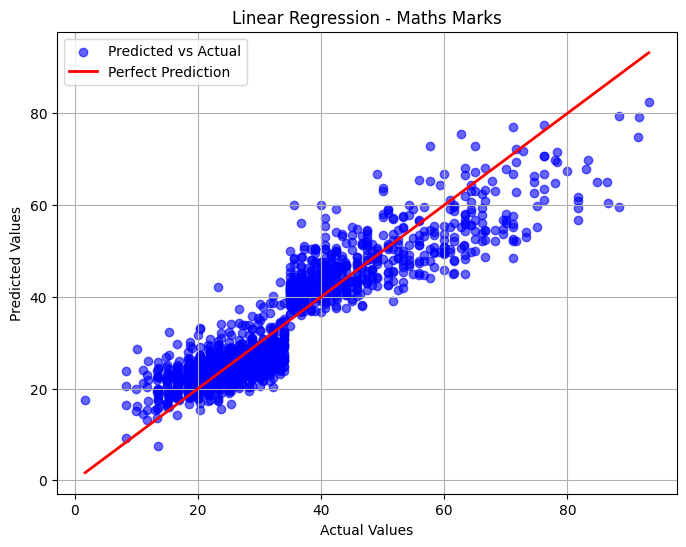

In [18]:
df2 = pd.read_csv("nas-students-data.csv")

df_encoded = pd.get_dummies(df2, drop_first=True)

X = df_encoded.drop(columns=["Maths_Percentage"], errors='ignore')
y = df_encoded["Maths_Percentage"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

def plot_predicted_vs_actual(y_test, y_pred, title="Predicted vs Actual"):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        color='red', linewidth=2, label="Perfect Prediction"
    )
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predicted_vs_actual(y_test, y_pred, title="Linear Regression - Maths Marks")

In [19]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")      
print(f"MSE: {mse:.2f}")         
print(f"RMSE: {rmse:.2f}") 

Model Evaluation Metrics:
R² Score: 0.8307
MSE: 35.98
RMSE: 6.00


In [20]:
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Average R²: {np.mean(scores):.4f}")

Average R²: 0.7979


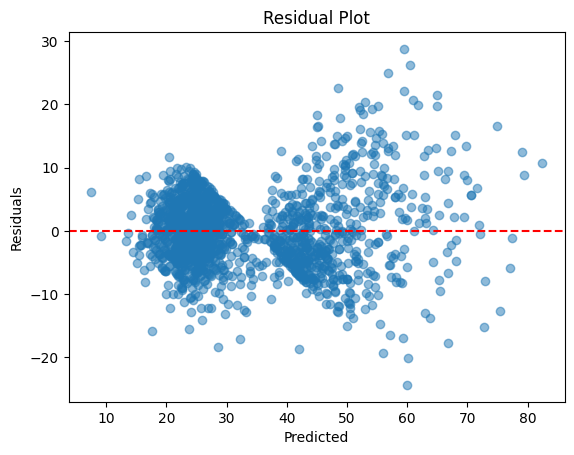

In [21]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [30]:
def load_and_prepare_data(filepath, target_col="Maths_Percentage"):
    df = pd.read_csv(filepath)
    df_encoded = pd.get_dummies(df, drop_first=True)

    X = df_encoded.drop(columns=[target_col], errors='ignore')
    y = df_encoded[target_col]

    return X, y

def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_model(X_train, y_train, n_estimators=100, random_state=42):
    model_Rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model_Rf.fit(X_train, y_train)
    return model_Rf

def evaluate_model(model_Rf, X_test, y_test):
    y_pred = model_Rf.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("Random Forest Evaluation")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MSE: {mse:.2f}")
    return r2, rmse, mse
if __name__ == "__main__":
    X, y = load_and_prepare_data("nas-students-data.csv")
    X_train, X_test, y_train, y_test = split_data(X, y)
    model_Rf = train_model(X_train, y_train)
    evaluate_model(model_Rf, X_test, y_test)

Random Forest Evaluation
R² Score: 0.8589
RMSE: 5.48
MSE: 29.99


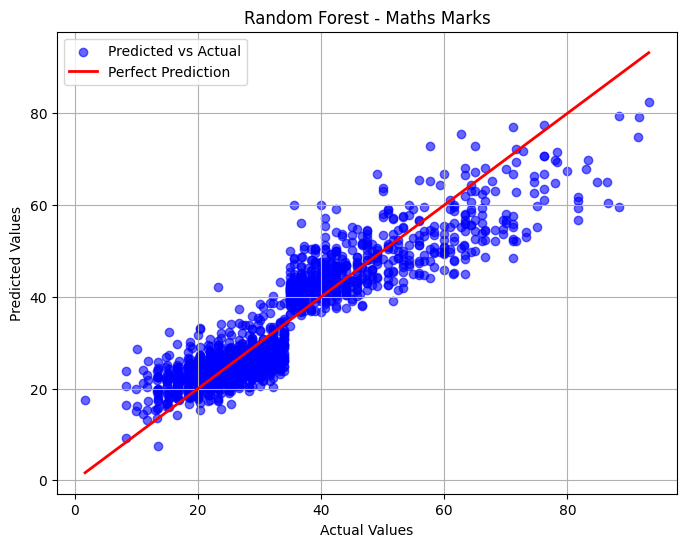

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red', linewidth=2, label="Perfect Prediction"
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest - Maths Marks")
plt.legend()
plt.grid(True)
plt.show()

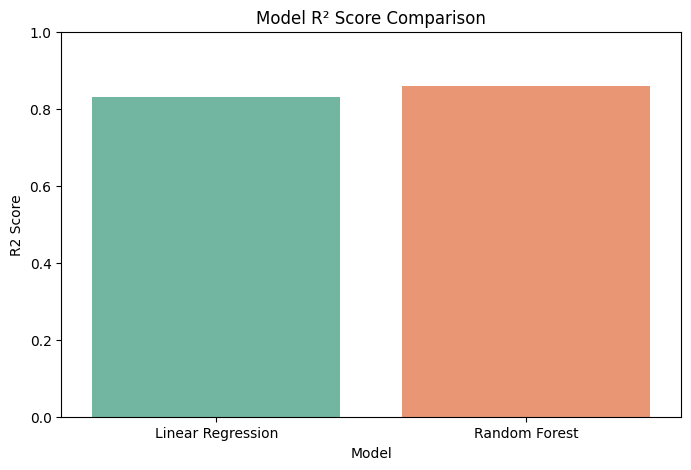

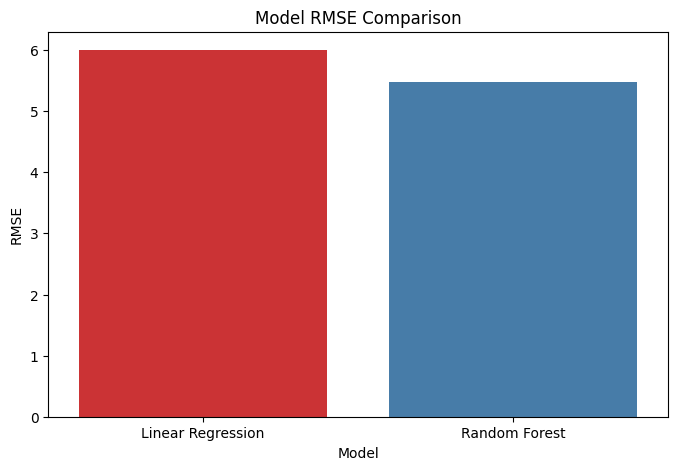

In [24]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2 Score": [0.8307, 0.8589],
    "RMSE": [6, 5.48]  
})

# Plot R² Scores
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="R2 Score", data=results, palette="Set2",hue='Model')
plt.title("Model R² Score Comparison")
plt.ylim(0, 1)
plt.show()

# Plot RMSE
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="RMSE", data=results, palette="Set1",hue="Model")
plt.title("Model RMSE Comparison")
plt.show()

Random Forest did better than Linear Regression here.

It made smaller mistakes on average, so its predictions were closer to the real marks.

## Cross-validation R² Score Distribution for Random Forest

The boxplot shows how the Random Forest model performed across 5 folds.
The scores are consistent, with an average R² of ~0.81, meaning the model explains about 81% of the variation in maths marks.

Cross-validation R² scores: [0.84282791 0.8044047  0.8241823  0.81542479 0.78704984]
Average R²: 0.8147779065755273


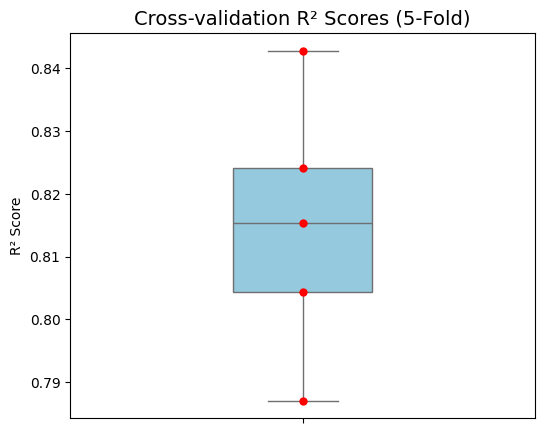

In [31]:
cv_scores = cross_val_score(model_Rf, X, y, cv=5, scoring='r2')

print("Cross-validation R² scores:", cv_scores)
print("Average R²:", cv_scores.mean())

plt.figure(figsize=(6,5))
sns.boxplot(data=cv_scores, color="skyblue", width=0.3)
sns.swarmplot(data=cv_scores, color="red", size=6)
plt.title("Cross-validation R² Scores (5-Fold)", fontsize=14)
plt.ylabel("R² Score")
plt.show()